# Generate Plots
This notebook is dedicated to generating plots of the data retrieved from the cluster.

In [1]:
from statistics import mean
import seaborn as sns
from cluster_utils import retrieve_executions_as_dataframe, \
    build_experiment_results_data_dict
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import os

# 1. Read stored lists from csv file
In this section, the data is parsed from the stored lists and prepared to be plotted.

In [2]:
towns_data_dict = build_experiment_results_data_dict(number_of_experiments=39,
                                                     folder_name='data')

# towns_data_dict_performance = build_experiment_results_data_dict(number_of_experiments=16,
#                                                                  folder_name='data_orig',
#                                                                  experiment_folder='cluster_experiment_0',
#                                                                  add_time=True)

INFO - cluster_utils.py - 58 - build_experiment_results_data_dict - 2021-03-09 23:13:32,686 - Entering the data_town_0 directory
INFO - cluster_utils.py - 58 - build_experiment_results_data_dict - 2021-03-09 23:13:33,264 - Entering the data_town_1 directory
INFO - cluster_utils.py - 58 - build_experiment_results_data_dict - 2021-03-09 23:13:34,014 - Entering the data_town_2 directory
INFO - cluster_utils.py - 58 - build_experiment_results_data_dict - 2021-03-09 23:13:34,737 - Entering the data_town_3 directory
INFO - cluster_utils.py - 58 - build_experiment_results_data_dict - 2021-03-09 23:13:35,662 - Entering the data_town_4 directory
INFO - cluster_utils.py - 58 - build_experiment_results_data_dict - 2021-03-09 23:13:36,467 - Entering the data_town_5 directory
INFO - cluster_utils.py - 58 - build_experiment_results_data_dict - 2021-03-09 23:13:37,345 - Entering the data_town_6 directory
INFO - cluster_utils.py - 58 - build_experiment_results_data_dict - 2021-03-09 23:13:37,883 - Ent

In [3]:
def set_plot_styles(title: str, x_label: str, y_label: str, save_file_name: str,
                    legend_location: str = 'upper right', legend_labels = None, title_size: int = 30,
                    labels_size: int = 20, ticks_size: int = 20, legend_size = 22, xticks_rotation: int = 45):

    if legend_labels is None:
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

    if legend_labels is None:
        plt.legend(ncol=1, loc=legend_location, fontsize=legend_size)
    else:
        plt.legend(labels=legend_labels, loc=legend_location, fontsize=legend_size + 2)

    plt.title(title, fontsize=title_size)
    plt.xlabel(x_label, fontsize=labels_size)
    plt.ylabel(y_label, fontsize=labels_size)

    plt.xticks(fontsize=ticks_size, rotation=xticks_rotation)
    plt.yticks(fontsize=ticks_size)

    plt.savefig(save_file_name, bbox_inches='tight')
    plt.show()

# 2. Generate model and Simulation time vs Population size

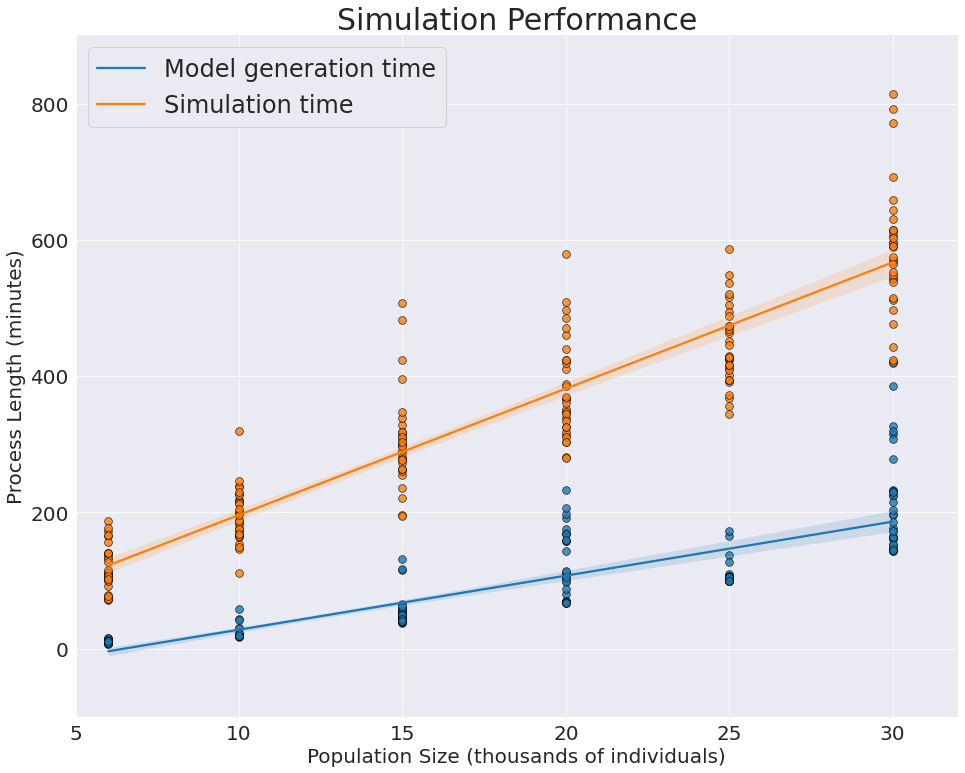

In [6]:
generate_model_times = list()
simulation_times = list()
population_sizes = list()

start_index = 5
end_index = 10

for town_index in towns_data_dict_performance:
    if town_index in range(start_index, end_index + 1):
        for data_dict in towns_data_dict_performance[town_index]:
            generate_model_times.append(data_dict['generation_time']//60)
            simulation_times.append(data_dict['simulation_time']//60)
            population_sizes.append(data_dict['population_size']//1000)

sns.set_style("darkgrid")

df = pd.DataFrame(list(zip(population_sizes + population_sizes, generate_model_times + simulation_times, ['Model generation time' for _ in generate_model_times] + ['Simulation time' for _ in simulation_times])),
               columns =['population_sizes', 'times', 'Process Category'])

ax = sns.lmplot(x='population_sizes',
                y='times',
                hue='Process Category',
                data=df,
                height=10,
                legend=False,
                robust=False,
                palette='tab10',
                aspect=1.3,
                scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

ax.set(xlim=(5, 32),
       ylim=(-100, 900))

set_plot_styles(title=r'Simulation Performance',
                x_label=r'Population Size (thousands of individuals)',
                y_label=r'Process Length (minutes)',
                save_file_name='Simulator_Performance.pdf',
                legend_location='upper left',
                legend_labels=['Model generation time', 'Simulation time'])

# 3. Confirmed cases vs Time: 20K population size.

<Figure size 936x720 with 0 Axes>

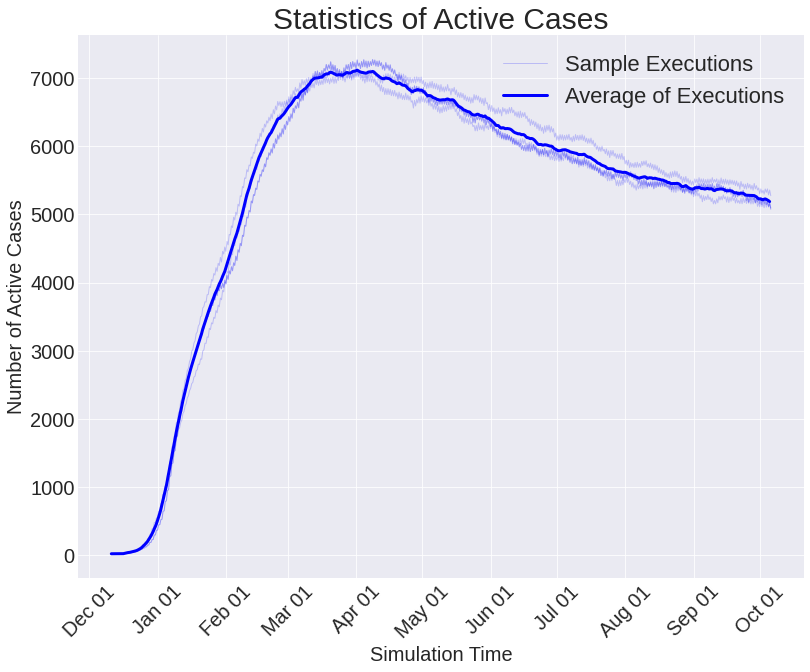

In [7]:
df = retrieve_executions_as_dataframe(experiments_data_dict=towns_data_dict,
                                      town_index=0,
                                      execution_ids=[1, 5, 10, 15, 25, 30])
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(13, 10))
fig, ax = plt.subplots(figsize=(13, 10))

for column in df.drop('time', axis=1):
    if df.drop('time', axis=1).columns[1] == column:
        plt.plot(df['time'], df[column], color='blue', linewidth=1, alpha=0.2, label='Sample Executions')
    plt.plot(df['time'], df[column], color='blue', linewidth=1, alpha=0.2)

data = np.average(df.drop('time', axis=1).values, axis=1)
data = np.convolve(data, np.ones((2,))/2, mode='valid')
data = data.tolist() + [None]

plt.plot(df['time'], data, color='blue', linewidth=3, label=r'Average of Executions')

set_plot_styles(title=r'Statistics of Active Cases',
                x_label=r'Simulation Time',
                y_label=r'Number of Active Cases',
                save_file_name='Normal_Executions_Plus_Average.pdf')

# 4. Error Bar + Confirmed cases vs Time: 20K population size.

<Figure size 936x720 with 0 Axes>

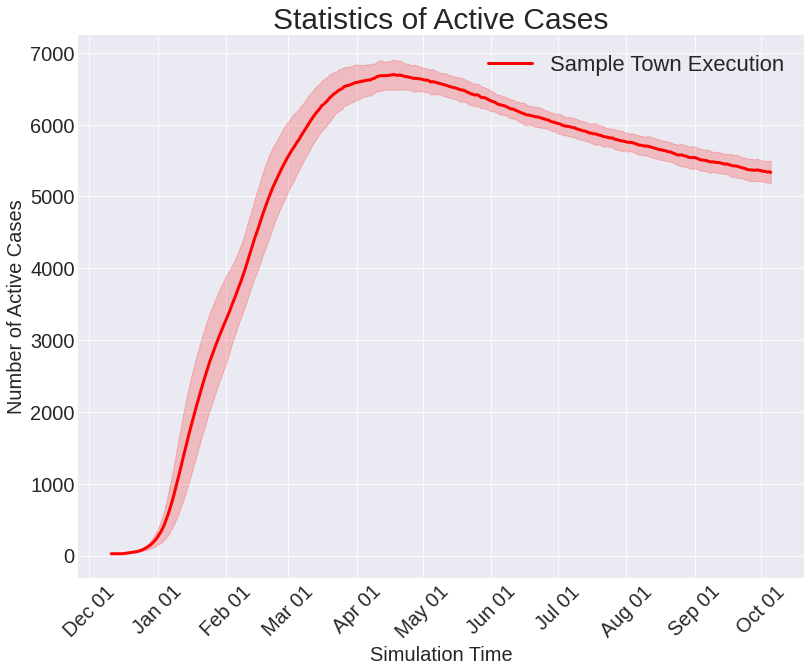

In [8]:
df = retrieve_executions_as_dataframe(experiments_data_dict=towns_data_dict,
                                      town_index=5,
                                      execution_ids=range(32))
# Find the list of stds
stds = list()
for row in df.drop('time', axis=1).values:
    stds.append(np.std(row))

stds = np.array(stds[: len(stds) - 1])

plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(13, 10))
fig, ax = plt.subplots(figsize=(13, 10))


data = np.average(df.drop('time', axis=1).values, axis=1)
data = np.convolve(data, np.ones((2,))/2, mode='valid')

plt.plot(df['time'], data.tolist() + [None],
         color='red', linewidth=3,
         label=r'Sample Town Execution')

plt.fill_between(df['time'][: len(df['time']) - 1],
                 data - stds,
                 data + stds,
                 color='red', alpha=0.2)

set_plot_styles(title=r'Statistics of Active Cases',
                x_label=r'Simulation Time',
                y_label=r'Number of Active Cases',
                save_file_name='Normal_Executions_Plus_Error_Band.pdf')

# 5. Compare Various Infectious Rate

{'lower_bound': 0.05, 'upper_bound': 0.6}
{'lower_bound': 0.55, 'upper_bound': 0.6}
{'lower_bound': 0.6, 'upper_bound': 0.9}
{'lower_bound': 0.8, 'upper_bound': 0.95}


<Figure size 936x720 with 0 Axes>

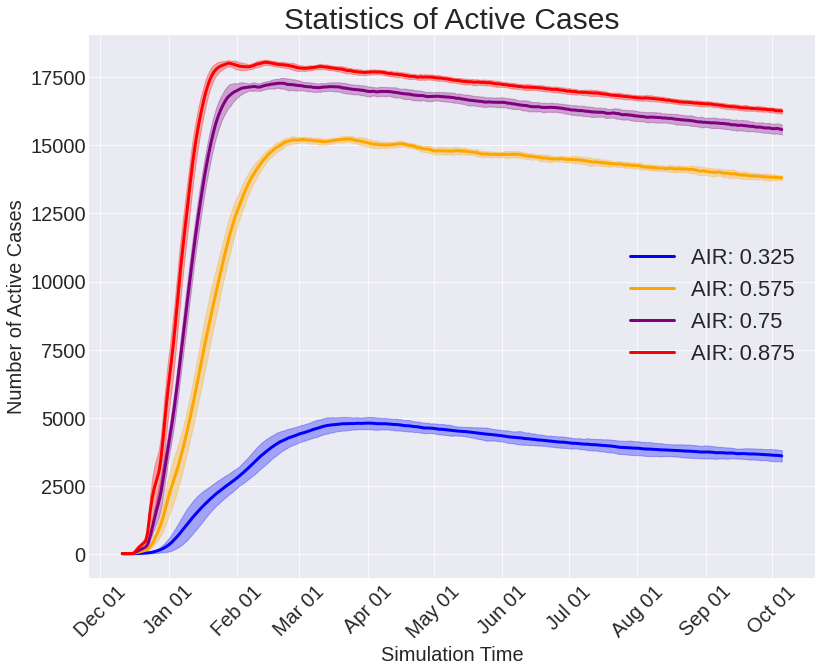

In [14]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(13, 10))
fig, ax = plt.subplots(figsize=(13, 10))


towns_df_list = list()
towns_immunity_list = list()
towns_std_list = list()
towns_average_list = list()
colors = ['blue', 'orange', 'purple', 'red', 'brown']

towns_index_list = [0, 1, 2, 3]
for index, town_index in enumerate(towns_index_list):
    df = retrieve_executions_as_dataframe(experiments_data_dict=towns_data_dict,
                                          town_index=town_index,
                                          execution_ids=range(32))
    infectious = towns_data_dict[town_index][0]['infectious_rate_dict']
    print(infectious)
    data = np.average(df.drop('time', axis=1).values, axis=1)
    average_stats = np.convolve(data, np.ones((2,))/2, mode='valid')

    stds = list()
    for row in df.drop('time', axis=1).values:
        stds.append(np.std(row))
    stds = np.array(stds[: len(stds) - 1])

    if not index:
        average_stats = 0.67 * average_stats

    plt.plot(df['time'][: len(df['time']) - 1],
             average_stats,
             color=colors[index], linewidth=3,
             label=f'AIR: {mean([infectious["upper_bound"], infectious["lower_bound"]])}')

    plt.fill_between(df['time'][: len(df['time']) - 1],
                 average_stats - stds,
                 average_stats + stds,
                 color=colors[index], alpha=0.3)

set_plot_styles(title=r'Statistics of Active Cases',
                x_label=r'Simulation Time',
                y_label=r'Number of Active Cases',
                legend_location= 'center right',
                save_file_name='Infectious_Effect_On_Infected.pdf')

# 6. Compare Various Immunity Rate

<Figure size 936x720 with 0 Axes>

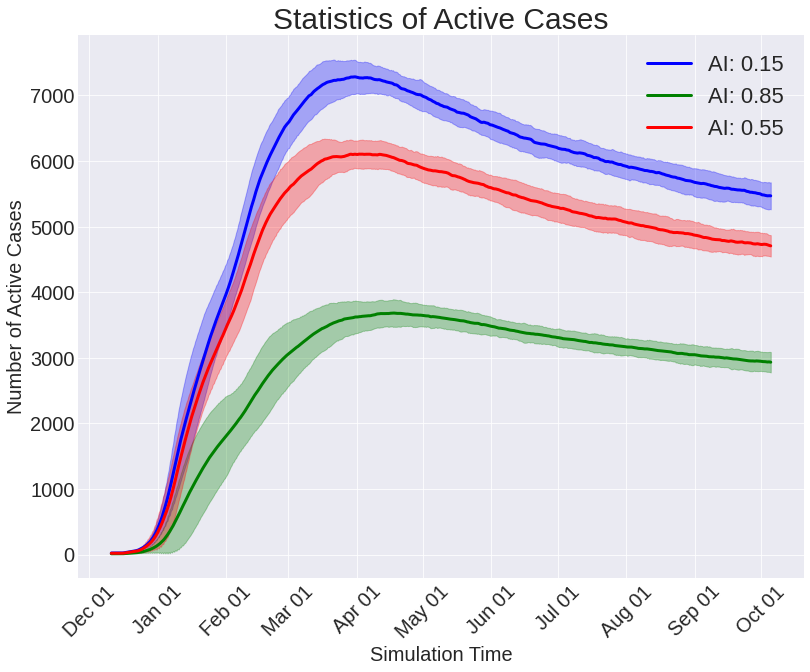

In [15]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(13, 10))
fig, ax = plt.subplots(figsize=(13, 10))

colors = ['blue', 'green', 'red', 'brown', 'purple']

town_index_list = [8, 5, 7]
fix = [1, 0.55, 0.85]
for index, town_index in enumerate(town_index_list):
    df = retrieve_executions_as_dataframe(experiments_data_dict=towns_data_dict,
                                          town_index=town_index,
                                          execution_ids=range(32))
    immunity = towns_data_dict[town_index][0]['immunity_distribution_dict']

    data = np.average(df.drop('time', axis=1).values, axis=1)
    average_stats = np.convolve(data, np.ones((2,))/2, mode='valid')
    average_stats *= fix[index]
    stds = list()
    for row in df.drop('time', axis=1).values:
        stds.append(np.std(row))
    stds = np.array(stds[: len(stds) - 1])

    plt.plot(df['time'][: len(df['time']) - 1],
             average_stats,
             color=colors[index], linewidth=3,
             label=f'AI: {round(mean([immunity["upper_bound"], immunity["lower_bound"]]) * 100) / 100}')

    plt.fill_between(df['time'][: len(df['time']) - 1],
                 average_stats - stds,
                 average_stats + stds,
                 color=colors[index], alpha=0.3)

set_plot_styles(title=r'Statistics of Active Cases',
                x_label=r'Simulation Time',
                y_label=r'Number of Active Cases',
                save_file_name='Immunity_Effect_On_Infected.pdf')

# 7. Quarantine Diseased People + Error

<Figure size 936x720 with 0 Axes>

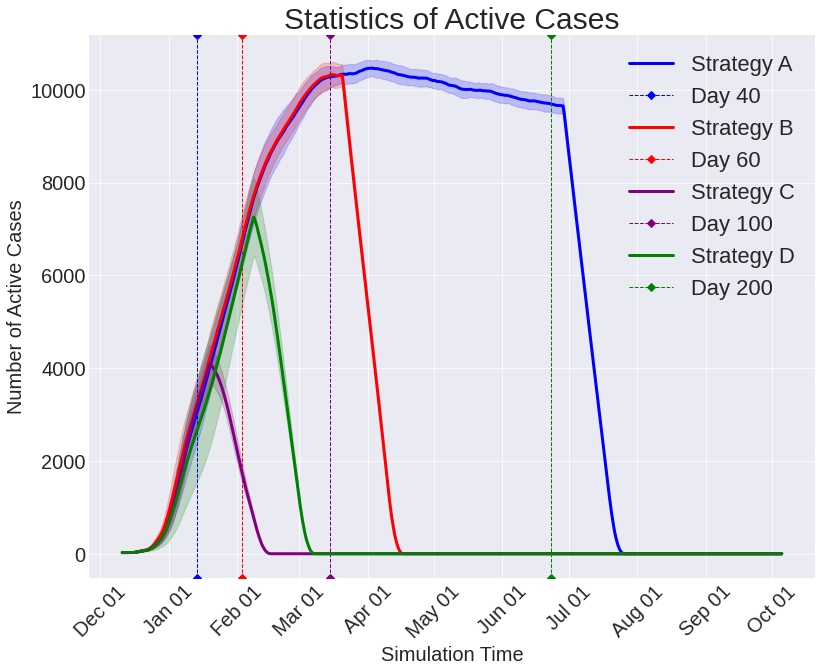

In [21]:
from datetime import timedelta
from json_handle import Parser
p = Parser(os.path.join('cluster_experiment_1', 'town_0'))
end_time = p.parse_simulator_data()[0]
init_time = end_time.init_date_time

plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(13, 10))
fig, ax = plt.subplots(figsize=(13, 10))

colors = ['blue', 'red', 'purple', 'green', 'brown']
quarantine = [40, 60, 100, 200]
label_data = ['A', 'B', 'C', 'D']
towns_index_list = [11, 12, 13, 14]

for index, town_index in enumerate(towns_index_list):
    df = retrieve_executions_as_dataframe(experiments_data_dict=towns_data_dict,
                                          town_index=town_index,
                                          execution_ids=range(32))
    immunity = towns_data_dict[town_index][0]['immunity_distribution_dict']

    data = np.average(df.drop('time', axis=1).values, axis=1)
    average_stats = np.convolve(data, np.ones((2,))/2, mode='valid')

    stds = list()
    for row in df.drop('time', axis=1).values:
        stds.append(np.std(row))
    stds = np.array(stds[: len(stds) - 1])

    plt.plot(df['time'][: len(df['time']) - 1],
             average_stats,
             color=colors[index], linewidth=3,
             label=f'Strategy {label_data[index]}')

    plt.fill_between(df['time'][: len(df['time']) - 1],
                 average_stats - stds,
                 average_stats + stds,
                 color=colors[index], alpha=0.2)

    plt.axvline(x=init_time + timedelta(days=quarantine[index]),
                color=colors[index],
                linewidth=1,
                linestyle='--',
                marker='D',
                label=f'Day {quarantine[index]}')

set_plot_styles(title=r'Statistics of Active Cases',
                x_label=r'Simulation Time',
                y_label=r'Number of Active Cases',
                save_file_name='Quarantine_Infected_Effect.pdf')

# 7.1. Quarantine Parts of the Diseased People + Error

<Figure size 936x720 with 0 Axes>

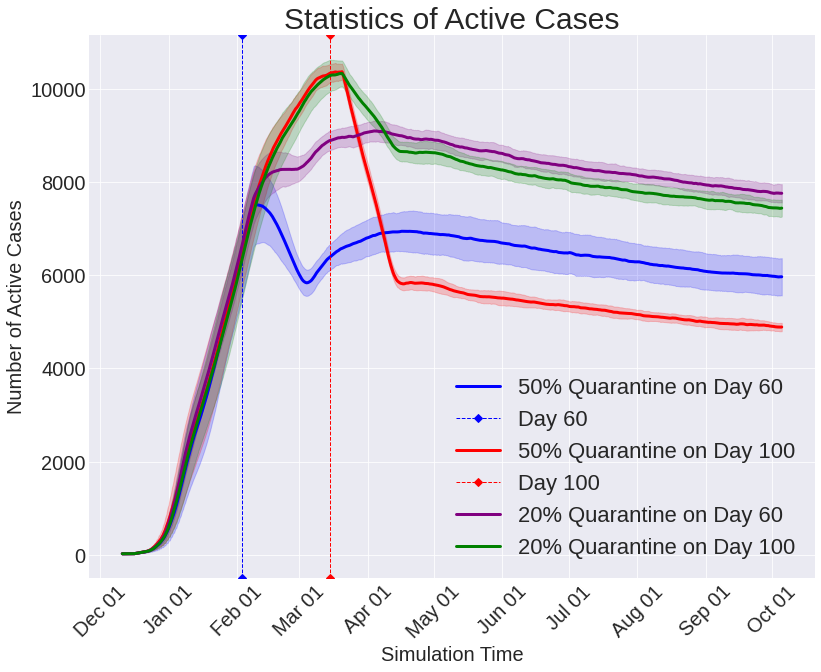

In [26]:
from datetime import timedelta
from json_handle import Parser
p = Parser(os.path.join('cluster_experiment_1', 'town_0'))
end_time = p.parse_simulator_data()[0]
init_time = end_time.init_date_time

plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(13, 10))
fig, ax = plt.subplots(figsize=(13, 10))

colors = ['blue', 'red', 'purple', 'green', 'brown']
quarantine = [60, 100, 60, 100]
label_data = ['50%', '50%', '20%', '20%']
towns_index_list = [15, 16, 17, 18]

for index, town_index in enumerate(towns_index_list):
    df = retrieve_executions_as_dataframe(experiments_data_dict=towns_data_dict,
                                          town_index=town_index,
                                          execution_ids=range(32))
    immunity = towns_data_dict[town_index][0]['immunity_distribution_dict']

    data = np.average(df.drop('time', axis=1).values, axis=1)
    average_stats = np.convolve(data, np.ones((2,))/2, mode='valid')

    stds = list()
    for row in df.drop('time', axis=1).values:
        stds.append(np.std(row))
    stds = np.array(stds[: len(stds) - 1])

    plt.plot(df['time'][: len(df['time']) - 1],
             average_stats,
             color=colors[index], linewidth=3,
             label=f'{label_data[index]} Quarantine on Day {quarantine[index]}')

    plt.fill_between(df['time'][: len(df['time']) - 1],
                 average_stats - stds,
                 average_stats + stds,
                 color=colors[index], alpha=0.2)

    if index < 2:
        plt.axvline(x=init_time + timedelta(days=quarantine[index]),
                    color=colors[index%2],
                    linewidth=1,
                    linestyle='--',
                    marker='D',
                    label=f'Day {quarantine[index]}')

set_plot_styles(title=r'Statistics of Active Cases',
                x_label=r'Simulation Time',
                y_label=r'Number of Active Cases',
                legend_location= 'lower right',
                save_file_name='Quarantine_Partially_Infected_Effect.pdf')

# 7.2. Quarantine/Unquarantine Diseased People + Error

<Figure size 936x720 with 0 Axes>

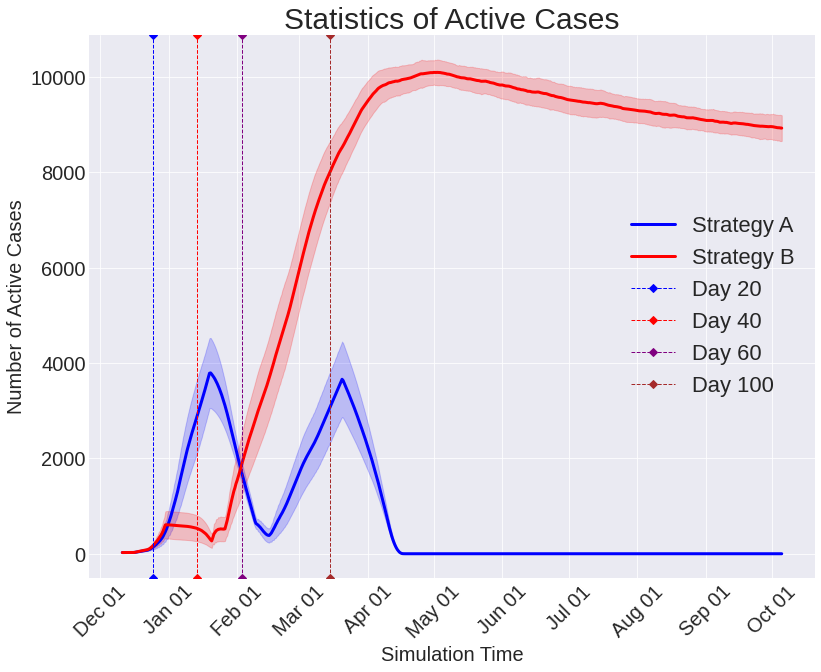

In [12]:
# TODO: Problem in
from datetime import timedelta
from json_handle import Parser

# find the initial simulation time
p = Parser(os.path.join('cluster_experiment_1', 'town_0'))
end_time = p.parse_simulator_data()[0]
init_time = end_time.init_date_time

plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(13, 10))
fig, ax = plt.subplots(figsize=(13, 10))

colors = ['blue', 'red', 'purple', 'brown']
quarantine = [20, 40, 60, 100]
label_data = ['A', 'B']
towns_index_list = [23, 22]

for index, town_index in enumerate(towns_index_list):
    df = retrieve_executions_as_dataframe(experiments_data_dict=towns_data_dict,
                                          town_index=town_index,
                                          execution_ids=range(32))

    data = np.average(df.drop('time', axis=1).values, axis=1)
    average_stats = np.convolve(data, np.ones((2,))/2, mode='valid')

    stds = list()
    for row in df.drop('time', axis=1).values:
        stds.append(np.std(row))
    stds = np.array(stds[: len(stds) - 1])

    plt.plot(df['time'][: len(df['time']) - 1],
             average_stats,
             color=colors[index], linewidth=3,
             label=f'Strategy {label_data[index]}')

    plt.fill_between(df['time'][: len(df['time']) - 1],
                 average_stats - stds,
                 average_stats + stds,
                 color=colors[index], alpha=0.2)

for index, q_day in enumerate(quarantine):
    plt.axvline(x=init_time + timedelta(days=q_day),
                color=colors[index],
                linewidth=1,
                linestyle='--',
                marker='D',
                label=f'Day {quarantine[index]}')

set_plot_styles(title=r'Statistics of Active Cases',
                x_label=r'Simulation Time',
                y_label=r'Number of Active Cases',
                legend_location='center right',
                save_file_name='Quarantine_Unquarantine_Infected_Effect.pdf')

# 7.3. Change the number of initially infected people

<Figure size 936x720 with 0 Axes>

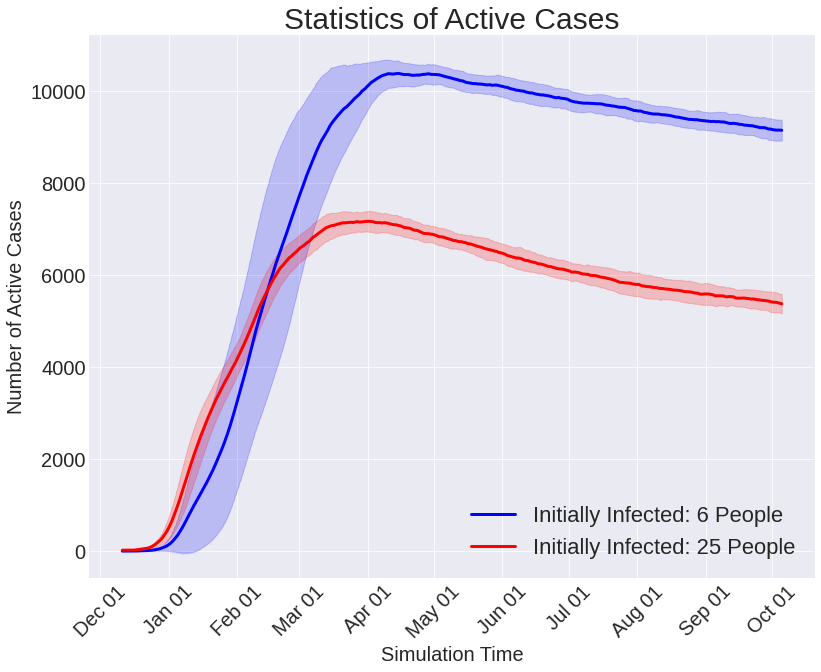

In [14]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(13, 10))
fig, ax = plt.subplots(figsize=(13, 10))

colors = ['blue', 'red']
label_data = ['6', '25']
towns_index_list = [19, 0]

for index, town_index in enumerate(towns_index_list):
    df = retrieve_executions_as_dataframe(experiments_data_dict=towns_data_dict,
                                          town_index=town_index,
                                          execution_ids=range(32))

    data = np.average(df.drop('time', axis=1).values, axis=1)
    average_stats = np.convolve(data, np.ones((2,))/2, mode='valid')

    stds = list()
    for row in df.drop('time', axis=1).values:
        stds.append(np.std(row))
    stds = np.array(stds[: len(stds) - 1])

    plt.plot(df['time'][: len(df['time']) - 1],
             average_stats,
             color=colors[index], linewidth=3,
             label=f'Initially Infected: {label_data[index]} People')

    plt.fill_between(df['time'][: len(df['time']) - 1],
                 average_stats - stds,
                 average_stats + stds,
                 color=colors[index], alpha=0.2)

set_plot_styles(title=r'Statistics of Active Cases',
                x_label=r'Simulation Time',
                y_label=r'Number of Active Cases',
                legend_location='lower right',
                save_file_name='Reduce_Initially_Infecteds.pdf')

# 8. Restrict workers

<Figure size 936x720 with 0 Axes>

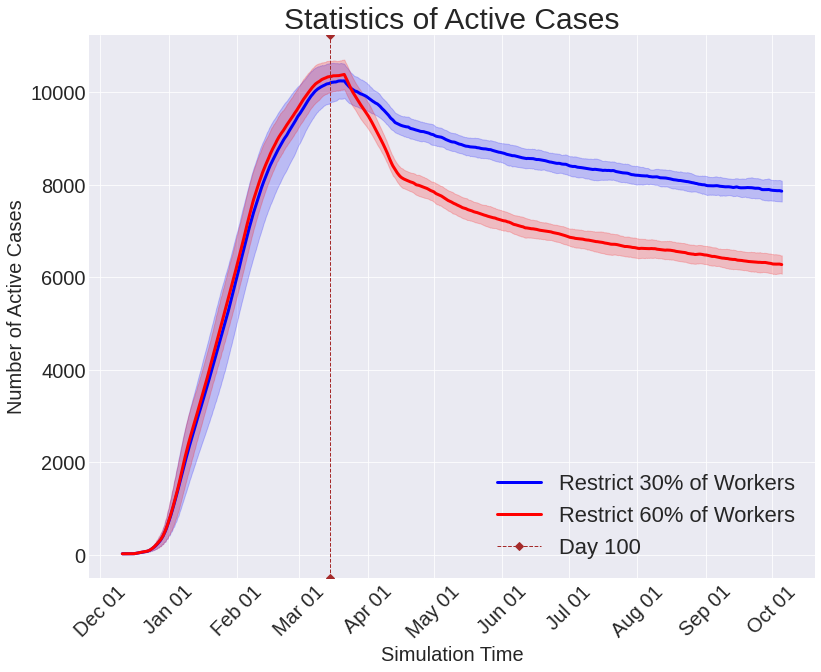

In [18]:
from datetime import timedelta
from json_handle import Parser
p = Parser(os.path.join('cluster_experiment_1', 'town_0'))
end_time = p.parse_simulator_data()[0]
init_time = end_time.init_date_time

plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(13, 10))
fig, ax = plt.subplots(figsize=(13, 10))

colors = ['blue', 'red', 'purple', 'green', 'brown']
quarantine = [20, 100, 20]
towns_index_list = [25, 26]
label_data = ['30%', '60%']

for index, town_index in enumerate(towns_index_list):
    df = retrieve_executions_as_dataframe(experiments_data_dict=towns_data_dict,
                                          town_index=town_index,
                                          execution_ids=range(32))

    data = np.average(df.drop('time', axis=1).values, axis=1)
    average_stats = np.convolve(data, np.ones((2,))/2, mode='valid')

    stds = list()
    for row in df.drop('time', axis=1).values:
        stds.append(np.std(row))
    stds = np.array(stds[: len(stds) - 1])

    plt.plot(df['time'][: len(df['time']) - 1],
             average_stats,
             color=colors[index], linewidth=3,
             label=f'Restrict {label_data[index]} of Workers')

    plt.fill_between(df['time'][: len(df['time']) - 1],
                 average_stats - stds,
                 average_stats + stds,
                 color=colors[index], alpha=0.2)

plt.axvline(x=init_time + timedelta(days=quarantine[1]),
            color=colors[4],
            linewidth=1,
            linestyle='--',
            marker='D',
            label=f'Day {quarantine[1]}')

set_plot_styles(title=r'Statistics of Active Cases',
                x_label=r'Simulation Time',
                y_label=r'Number of Active Cases',
                legend_location='lower right',
                save_file_name='Quarantine_Workers_Effect.pdf')

# 8.1. Restrict Society Sectors

<Figure size 936x720 with 0 Axes>

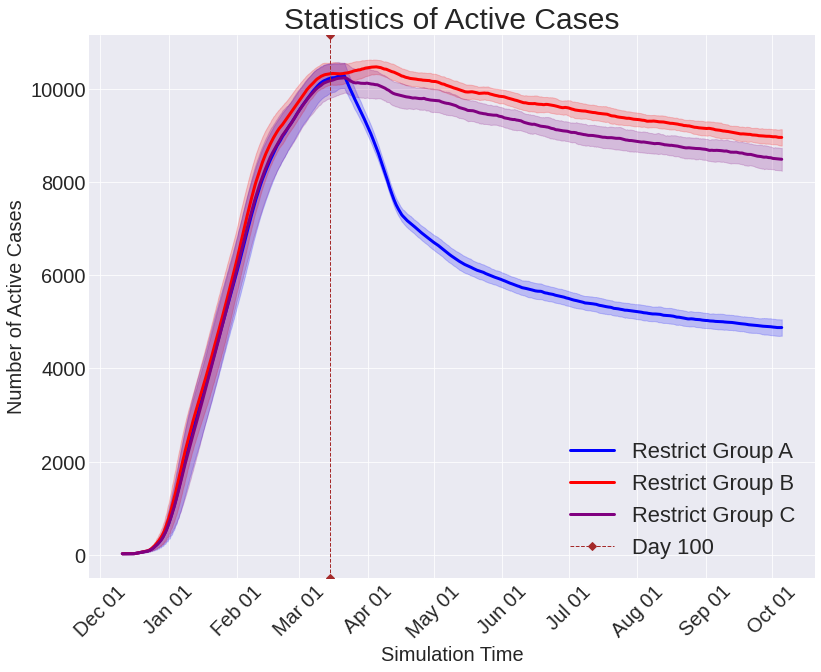

In [21]:
from datetime import timedelta
from json_handle import Parser
p = Parser(os.path.join('cluster_experiment_1', 'town_0'))
end_time = p.parse_simulator_data()[0]
init_time = end_time.init_date_time

plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(13, 10))
fig, ax = plt.subplots(figsize=(13, 10))

colors = ['blue', 'red', 'purple', 'green', 'brown']
quarantine = [20, 100, 20]
towns_index_list = [28, 29, 30]
label_data = ['Group A',
              'Group B',
              'Group C']

for index, town_index in enumerate(towns_index_list):
    df = retrieve_executions_as_dataframe(experiments_data_dict=towns_data_dict,
                                          town_index=town_index,
                                          execution_ids=range(32))

    data = np.average(df.drop('time', axis=1).values, axis=1)
    average_stats = np.convolve(data, np.ones((2,))/2, mode='valid')

    stds = list()
    for row in df.drop('time', axis=1).values:
        stds.append(np.std(row))
    stds = np.array(stds[: len(stds) - 1])

    plt.plot(df['time'][: len(df['time']) - 1],
             average_stats,
             color=colors[index], linewidth=3,
             label=f'Restrict {label_data[index]}')

    plt.fill_between(df['time'][: len(df['time']) - 1],
                 average_stats - stds,
                 average_stats + stds,
                 color=colors[index], alpha=0.2)

plt.axvline(x=init_time + timedelta(days=quarantine[1]),
            color=colors[4],
            linewidth=1,
            linestyle='--',
            marker='D',
            label=f'Day {quarantine[1]}')

set_plot_styles(title=r'Statistics of Active Cases',
                x_label=r'Simulation Time',
                y_label=r'Number of Active Cases',
                legend_location='lower right',
                save_file_name='Quarantine_Society_Sectors.pdf')

# 8.2. Bang-bang controller

INFO - population_generator.py - 1305 - __init__ - 2021-03-09 23:28:24,889 - Population Generator created


<Figure size 936x720 with 0 Axes>

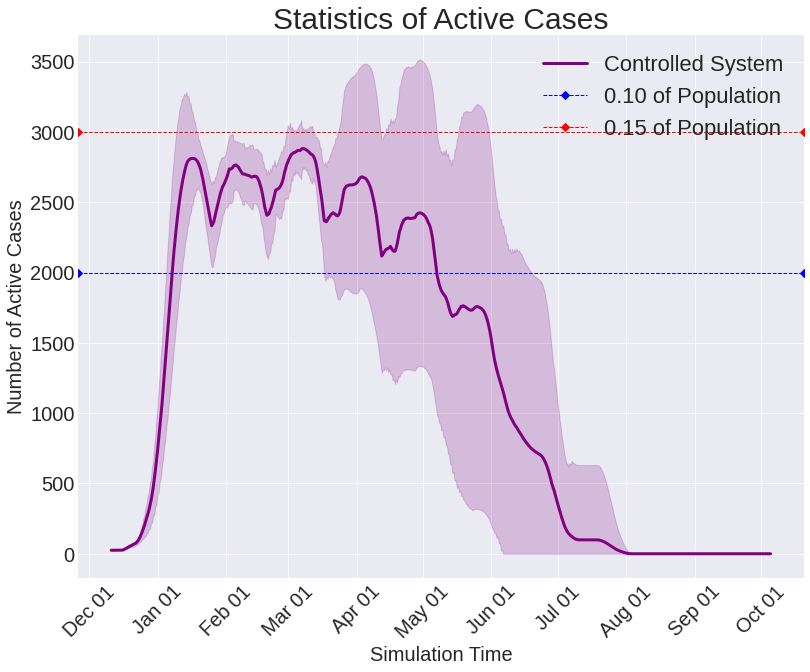

In [33]:
import numpy as np
from json_handle import Parser

p = Parser(os.path.join('cluster_experiment_1', 'town_0'))
population_size = p.parse_population_generator().population_size

plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(13, 10))
fig, ax = plt.subplots(figsize=(13, 10))

colors = ['purple']
towns_index_list = [33]
label_data = ['Controlled System']

for index, town_index in enumerate(towns_index_list):
    df = retrieve_executions_as_dataframe(experiments_data_dict=towns_data_dict,
                                          town_index=town_index,
                                          execution_ids=range(32))

    data = np.average(df.drop('time', axis=1).values, axis=1)
    average_stats = np.convolve(data, np.ones((2,))/2, mode='valid')

    stds = list()
    for row in df.drop('time', axis=1).values:
        stds.append(np.std(row))
    stds = np.array(stds[: len(stds) - 1])

    plt.plot(df['time'][: len(df['time']) - 1],
             average_stats,
             color=colors[index], linewidth=3,
             label=label_data[index])

    minus_std = average_stats - stds
    minus_std = [0 if el < 0 else el for el in minus_std]

    plt.fill_between(df['time'][: len(df['time']) - 1],
                 minus_std,
                 average_stats + stds,
                 color=colors[index], alpha=0.2)

plt.axhline(y=0.1 * population_size,
            color='blue',
            linewidth=1,
            linestyle='--',
            marker='D',
            label=f'0.10 of Population')

plt.axhline(y=0.15 * population_size,
            color='red',
            linewidth=1,
            linestyle='--',
            marker='D',
            label=f'0.15 of Population')

set_plot_styles(title=r'Statistics of Active Cases',
                x_label=r'Simulation Time',
                y_label=r'Number of Active Cases',
                legend_location='upper right',
                save_file_name='Bang_Bang_Controller.pdf')

# 8.3. Cut-Off controller

INFO - population_generator.py - 1305 - __init__ - 2021-03-09 23:29:40,263 - Population Generator created


<Figure size 936x720 with 0 Axes>

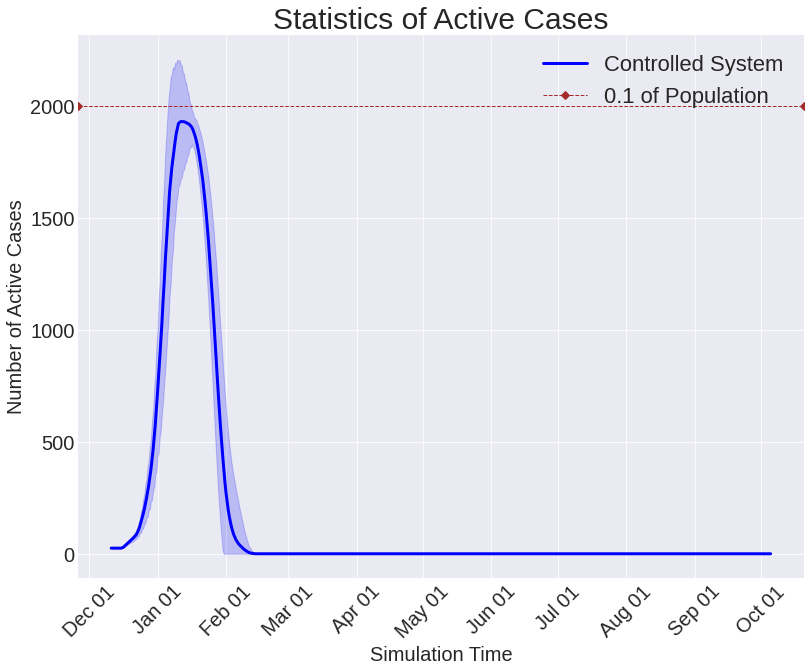

In [36]:
import numpy as np
from json_handle import Parser

p = Parser(os.path.join('cluster_experiment_1', 'town_0'))
population_size = p.parse_population_generator().population_size

plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(13, 10))
fig, ax = plt.subplots(figsize=(13, 10))

colors = ['blue']
towns_index_list = [32]
label_data = ['Controlled System']

for index, town_index in enumerate(towns_index_list):
    df = retrieve_executions_as_dataframe(experiments_data_dict=towns_data_dict,
                                          town_index=town_index,
                                          execution_ids=range(32))

    data = np.average(df.drop('time', axis=1).values, axis=1)
    average_stats = np.convolve(data, np.ones((2,))/2, mode='valid')

    stds = list()
    for row in df.drop('time', axis=1).values:
        stds.append(np.std(row))
    stds = np.array(stds[: len(stds) - 1])

    plt.plot(df['time'][: len(df['time']) - 1],
             average_stats,
             color=colors[index], linewidth=3,
             label=label_data[index])

    minus_std = average_stats - stds
    minus_std = [0 if el < 0 else el for el in minus_std]

    plt.fill_between(df['time'][: len(df['time']) - 1],
                 minus_std,
                 average_stats + stds,
                 color=colors[index], alpha=0.2)

plt.axhline(y=0.1 * population_size,
            color='brown',
            linewidth=1,
            linestyle='--',
            marker='D',
            label=f'0.1 of Population')

set_plot_styles(title=r'Statistics of Active Cases',
                x_label=r'Simulation Time',
                y_label=r'Number of Active Cases',
                save_file_name='Cut_Off_Control.pdf')

